# Loading and preprocesing

Importing libraries

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob
import keras
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras_preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input
from keras.models import Model, load_model
from keras.applications.mobilenet import MobileNet

In [21]:
root_dir="/content/drive/MyDrive/Thesis resources/Datasets/dataset'/Mini_DDSM_Upload"
number_of_images={}
for dir in os.listdir(root_dir):
  number_of_images[dir]=len(os.listdir(os.path.join(root_dir,dir)))

Creating Traning Folder

In [22]:

def dataFolder(p,split):
  if not os.path.exists("/content/drive/MyDrive/"+p):
    os.mkdir("/content/drive/MyDrive/"+p)
    for dir in os.listdir(root_dir):
      os.makedirs("/content/drive/MyDrive/"+p+"/"+dir)
      for img in np.random.choice(a=os.listdir(os.path.join(root_dir,dir)),size=(math.floor(split*number_of_images[dir])-5),replace=False):
        O=os.path.join(root_dir,dir,img)
        D=os.path.join("/content/drive/MyDrive/"+p,dir)
        shutil.copy(O,D)
        os.remove(O)
  else:
    print(f"{p} Folder exist")

In [25]:
dataFolder("thesis_train",0.7)
dataFolder("thesis_test",0.15)
dataFolder("thesis_val",0.15)

thesis_train Folder exist


In [26]:
root_dir="/content/drive/MyDrive/Thesis resources/Datasets/dataset'/Mini_DDSM_Upload"
number_of_images={}
for dir in os.listdir(root_dir):
  number_of_images[dir]=len(os.listdir(os.path.join(root_dir,dir)))
number_of_images.items()

dict_items([('Normal', 16), ('Cancer', 16), ('Benign', 16)])

# Basic CNN model

In [27]:
#CNN Model
model= Sequential()
model.add(Conv2D(filters=16,kernel_size=(3,3), activation= 'relu', input_shape=(224,224,3)))

model.add(Conv2D(filters=32,kernel_size=(3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation= 'relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [28]:
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

In [29]:
def preprocessingImages1(path):
  image_data=ImageDataGenerator(zoom_range=0.2,shear_range=0.2, rescale=1/255, horizontal_flip=True)
  image= image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode= 'binary')

  return image 

In [32]:
path="/content/drive/MyDrive/thesis_train"
train_data= preprocessingImages1(path)

Found 6772 images belonging to 3 classes.


In [34]:
def preprocessingImages2(path):
  image_data=ImageDataGenerator(rescale=1/255)
  image= image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode= 'binary')

  return image 

In [35]:
path="/content/drive/MyDrive/thesis_test"
test_data= preprocessingImages2(path)

Found 1439 images belonging to 3 classes.


In [36]:
path="/content/drive/MyDrive/thesis_val"
val_data= preprocessingImages2(path)

Found 1439 images belonging to 3 classes.


In [38]:
# early stopping and model check point
from keras.callbacks import ModelCheckpoint, EarlyStopping

#Early stopping
es=EarlyStopping (monitor="val_accuracy",min_delta=0.01, patience=6, verbose=1, mode='auto')

#model check point
mc= ModelCheckpoint(monitor="val_accuracy",filepath="/content/drive/MyDrive/Thesis work/bmodel.h5",verbose=1, save_best_only=True, mode='auto')
cd=[es,mc]


Model traning

In [40]:
# model Training
hs=model.fit_generator(generator=train_data, steps_per_epoch=8, epochs=60, verbose=1, validation_data=val_data, validation_steps=16, callbacks=cd )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/60
8/8 [==============================] - ETA: 0s - loss: 0.8059 - accuracy: 0.4023
Epoch 1: val_accuracy improved from -inf to 0.38477, saving model to /content/drive/MyDrive/Thesis work/bmodel.h5
8/8 [==============================] - 41s 5s/step - loss: 0.8059 - accuracy: 0.4023 - val_loss: 0.1242 - val_accuracy: 0.3848
Epoch 2/60
8/8 [==============================] - ETA: 0s - loss: -0.3600 - accuracy: 0.3555
Epoch 2: val_accuracy did not improve from 0.38477
8/8 [==============================] - 40s 5s/step - loss: -0.3600 - accuracy: 0.3555 - val_loss: 0.5067 - val_accuracy: 0.3691
Epoch 3/60
8/8 [==============================] - ETA: 0s - loss: 0.0090 - accuracy: 0.3867 
Epoch 3: val_accuracy did not improve from 0.38477
8/8 [==============================] - 40s 5s/step - loss: 0.0090 - accuracy: 0.3867 - val_loss: 0.1398 - val_accuracy: 0.3535
Epoch 4/60
8/8 [==============================] - ETA: 0s - loss: 0.0943 - accuracy: 0.3867
Epoch 4: val_accuracy did not im

In [41]:
h=hs.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

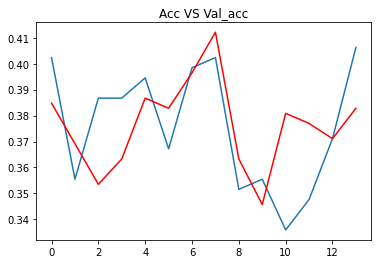

In [43]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c="red")

plt.title("Acc VS Val_acc")
plt.show()

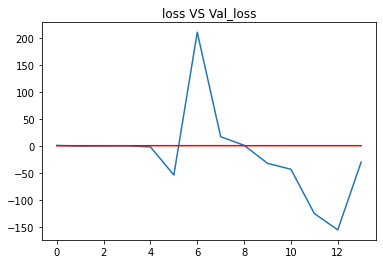

In [44]:
plt.plot(h['loss'])
plt.plot(h['val_accuracy'], c="red")

plt.title("loss VS Val_loss")
plt.show()

loading model

In [46]:

from keras.models import load_model
mdl= load_model("/content/drive/MyDrive/Thesis work/bmodel.h5")

Model accuracy

In [ ]:
acc=mdl.evaluate_generator(test_data)[1]
print(f"The accuracy of our model is {acc*100}%")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


In [53]:
def preprocessingImages1(path):
  image_data=ImageDataGenerator(zoom_range=0.2,shear_range=0.2, rescale=1/255, horizontal_flip=True)
  image= image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode= 'binary')

  return image 

In [54]:
path="/content/drive/MyDrive/thesis_train"
train_data= preprocessingImages1(path)

Found 6772 images belonging to 3 classes.


In [55]:
def preprocessingImages2(path):
  image_data=ImageDataGenerator(preprocessing_function=preprocess_input)
  image= image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode= 'binary')
  return image

In [56]:
path="/content/drive/MyDrive/thesis_test"
test_data= preprocessingImages2(path)

Found 1439 images belonging to 3 classes.


In [57]:
path="/content/drive/MyDrive/thesis_val"
val_data= preprocessingImages2(path)

Found 1439 images belonging to 3 classes.


In [58]:
base_model=MobileNet(input_shape=(224,224,3), include_top=False)

17235968/17225924 [==============================] - 1s 0us/step


In [59]:
for layer in base_model.layers:
  layer.trainable= False

In [60]:
X=Flatten()(base_model.output)
X=Dense(units=1, activation='sigmoid')(X)

model=Model(base_model.input,X)

In [61]:
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [62]:
model.compile(optimizer='rmsprop',loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

In [63]:
#call back
from keras.callbacks import ModelCheckpoint, EarlyStopping
#model check point
mc=ModelCheckpoint(filepath="/content/drive/MyDrive/Thesis work/bemodel.h5",monitor='val_accuracy',verbose=1, save_best_only=True)
# Early Stopping
es=EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=8, verbose=1)
cb=[mc,es]

In [ ]:
hist=model.fit_generator(train_data,
                         steps_per_epoch=8,
                         epochs=50,
                         validation_data=val_data,
                         validation_steps=16,
                         callbacks=cb)